# Logistic Regression
Here we will briefly discuss the use cases and model structure of the logistic regression learning algorithm. We will then generate a toy data set from scratch and use the data to build a predictive model using binary logistic regression. Finally we will finish by building a multiple logisitic regression model using one of the standard data sets seen in many introductory examples, the Iris data set.

## Brief Overview 
Logistic regression is a generalization of the linear regression model (we will mention this in more detail when we get to the math!) and is a more effective method when target (response) variables take on values in a discrete set. The most simple form of logistic regression is known as binary logistic regression and deals with the case when the target variables take on two discrete values, e.g. pass or fail, male or female, etc. In general, target variables need not take on only two discrete values, and the logistic regression technique can serve as a very effective model to perform prediction.

## The Math
Suppose we are given the data $y = (y_0, \cdots, y_N)$ and $X = (x_1, x_2,\cdots, x_N)$ where $y$ is a target variable such that each $y_i \in \{0,1\}$ and $X$ is a prediction variable either taking on values in a discrete or continuous set (categorical or quantitative, respectively, in statistical learning terms). The goal is to build a model to use the data $X$ to predict the probability that $y_i=1$ or $y_i=0$ given the value of $x_i$. Note that to keep the analysis and notation simple we are working in the one dimensional case (so that we only have one predictor). This is not necessary in general, since the model extends to multiple dimensions in a straightforward manner. 

Formally we would like to build a model that allows us to estimate the probability functions
$$P(y_i=1 | \   x_i ), \ P(y_i=0 | \ x_i ).$$
Jumping straight to the punch and pulling the rabbit out of the hat we assume that the probability distribution function $f(X)$ is defined as follows:
$$f(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}.$$

If you look carefully at the distribution you should recognize the presence of the simple linear regression model which takes the form $y = \beta_0 + \beta_1 x$. In fact the function $f(X)$ is just a transformation of the linear regression model:
$$
\begin{align*}
\log\left(\frac{f(X)}{1-f(X)}\right) = \log(f(X)) - \log(1-f(X)) &= \log(e^{\beta_0 + \beta_1 X}) - \log\left(1 - \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}\right) \\
&= \beta_0 + \beta_1 X - \log(1 + e^{\beta_0 + \beta_1 X} - e^{\beta_0 + \beta_1 X})\\
&= \beta_0 + \beta_1 X.
\end{align*}
$$
This transformation is known as the **logit** transformation. 

Now just like linear regression our goal is to estimate the parameters $\beta_0, \beta_1$. To do so we use the maximum likelihood method which seeks to minimize the function
$$\ell(\beta_0,\beta_1) = \prod_{i: y_i=1} f(x_i) \prod_{i : y_i = 0}(1-f(x_i))$$
It turns it this is an untractable problem to find a closed form solution, hence one must perform a numerical routine to compute the estimates. A common strategy is to use the Newton-Raphson method, but in our example we will use the routine implemented in Scikitlearn. 

So let's get started! In what follows we will generate a toy data set with $N=200$ observations and $P=3$ variables $X_1, X_2, Y$, where the $X_i$'s are quantitative predictors and $Y$ is the discrete response taking on values in ${0,1}$. Our goal will be to use a subset of the data to build a predictive model so that we can use a given $X_i$ to determine if the respective $Y_i$ is in fact a 0 or 1.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

## Generate Data and Transform into DataFrame

In [2]:
X1  = np.array([np.linspace(0,6,100), np.linspace(4,10,100)]).flatten()
X2 = np.random.rand(200)

Y = np.zeros(200,dtype=int)
Y[100:200].fill(1)

d = {'X1': X1, 'X2': X2, 'Y': Y}
data = pd.DataFrame(data=d, index=None)
data.head()

,X1,X2,Y
0,0.000000,0.616422,0
1,0.060606,0.395611,0
2,0.121212,0.804071,0
3,0.181818,0.791182,0
4,0.242424,0.838960,0


## Visualize Data

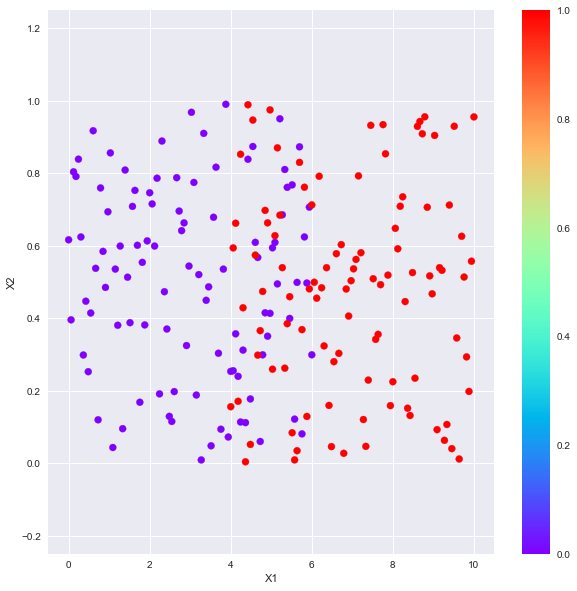

In [3]:
labels = Y
plt.figure(figsize=(10,10))
plt.scatter(data.X1,data.X2, label='Failed', c=labels, cmap='rainbow');
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-0.25,1.25)
plt.colorbar();

## Build Logistic Regression Model
After visualizing the data set we can see that $X_1$ appears to be a good predictor to determine whether or not the data is either purple or red (of course this is by construction, but it's an important part of the analysis!). We can see an approximate boundary line that separates the data somewhere between $X_1 = 4$ and $X_1=6$, which makes sense considering how we generated the data. Thus we will use $X_1$ to build our binary logistic regression model.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.33, random_state=24)

log_regr = LogisticRegression()

log_regr.fit(X_train.reshape(-1,1), y_train)
log_regr.score(X_test.reshape(-1,1), y_test)

beta0 = log_regr.intercept_[0]
beta1 = log_regr.coef_[0][0]

print 'Slope                      : %r' % beta1
print 'Intercept                  : %r' % beta0
print 'Mean Accuracy of test data : %r' % log_regr.score(X_test.reshape(-1,1), y_test)


Slope                      : 0.77570209359875375
Intercept                  : -3.7513785112263616
Mean Accuracy of test data : 0.84848484848484851


In [5]:
def logit(beta0, beta1, x):
    num = np.exp(beta0 + beta1*x)
    denom = 1 + num
    
    return num/denom

x = np.linspace(0,10,1000)
f = logit(beta0, beta1, x)

decision_bound = -beta0/beta1

print 'Decision boundary occurs at %r' %round(decision_bound,2)

Decision boundary occurs at 4.84


We see that the model found that the correct place to split the data set occurs at the value 4.84. In other words the model will predict that all values of $X_1$ greater than 4.84 should be classified as having a value of $y=1$ whereas all values less than 4.84 should be classified as having a value of $y=0$. This aligns well with how the data was generated and also matches the intuition gained from the data visualization.

## Plot Results
Now let's view the probability function generated by the model and compare it with the data to visualize the decision boundary.

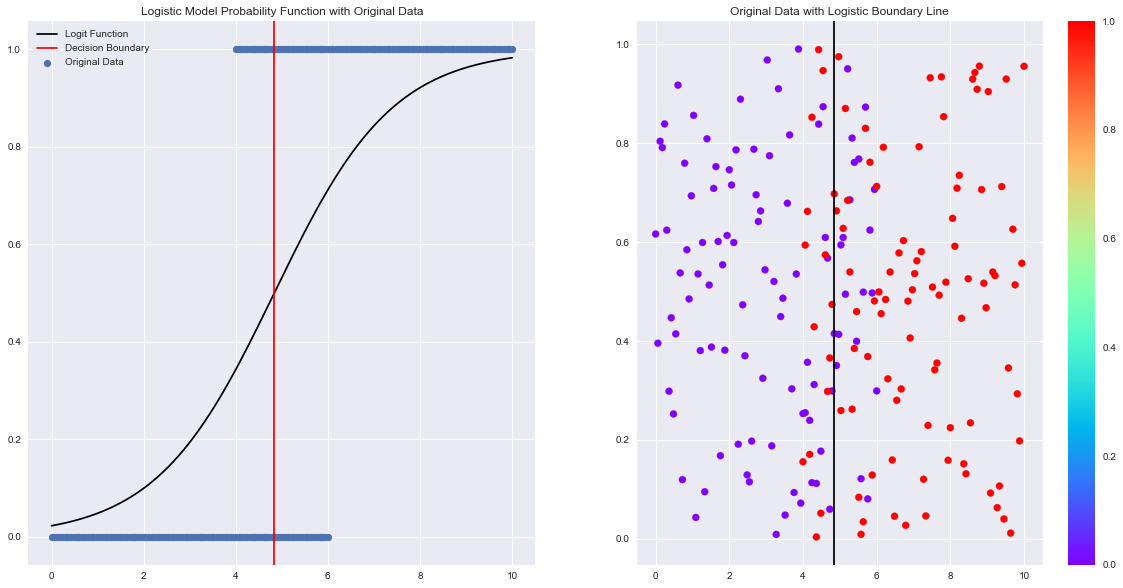

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Logistic Model Probability Function with Original Data')
plt.scatter(X1, Y, label='Original Data')
plt.plot(x,f,'k', label='Logit Function');
plt.axvline(decision_bound, color='r', label='Decision Boundary') 
plt.legend();
plt.subplot(1,2,2)
plt.title("Original Data with Logistic Boundary Line")
plt.scatter(data.X1,data.X2, c=labels, cmap='rainbow')
plt.axvline(decision_bound, color='black')
plt.colorbar();

## The Iris Data Set

In [7]:
from sklearn.datasets import load_iris

#Import Iris Data
iris_data = load_iris()

# View Information of Data Set
print iris_data.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Visualize Data Set
Now that we have imported the data set, we should do some visualization to get a feel for the data we are working with. To do so we will generate 2D-scatter plots for each of the respective variables and in each scatter plot use a specific color to differentiate between the different class species of the data set. Once we have done this we can inspect the plots by eye to determine which features to use to build our multiple logistic regression model. 

What we will look for in the scatter plots are possible boundaries to distinguish the three different classes, and since we are building a simple model, we would like to find boundary lines that separate the data with straight lines.

In [8]:
# Create Variables for each column of data
sep_length = iris_data.data[:,0]
sep_width  = iris_data.data[:,1]
pet_length = iris_data.data[:,2]
pet_width  = iris_data.data[:,3]

# Vector of feature labels
labels = iris_data.target

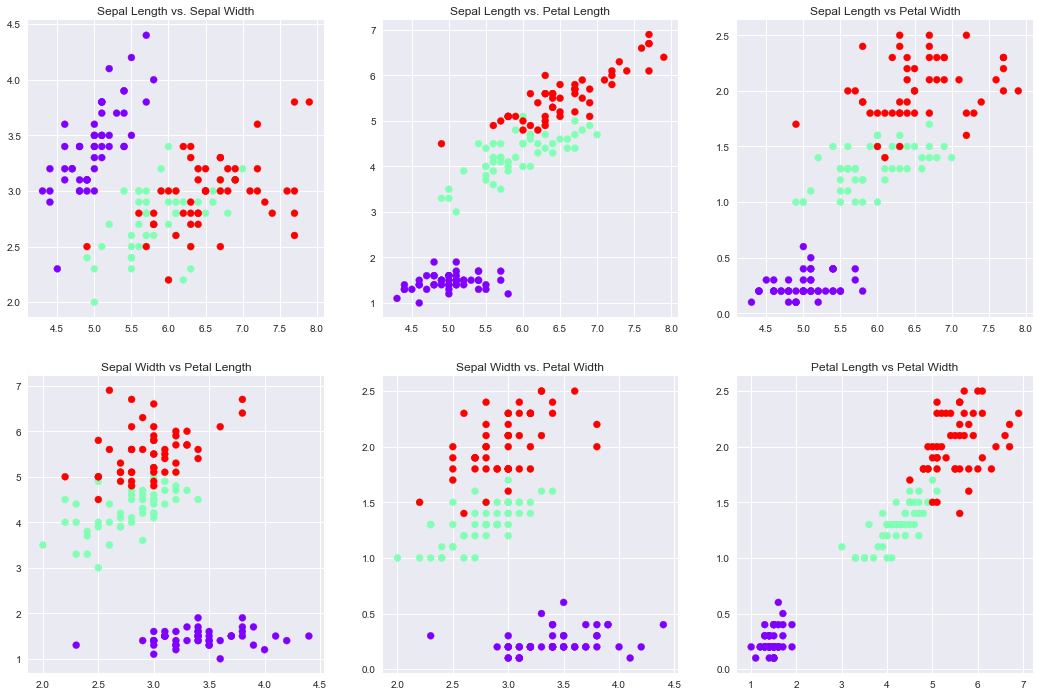

In [9]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
plt.scatter(sep_length, sep_width, c=labels, cmap='rainbow');
plt.title('Sepal Length vs. Sepal Width');
plt.subplot(2,3,2)
plt.scatter(sep_length, pet_length, c=labels, cmap='rainbow');
plt.title('Sepal Length vs. Petal Length');
plt.subplot(2,3,3)
plt.scatter(sep_length, pet_width, c=labels, cmap='rainbow');
plt.title('Sepal Length vs Petal Width');
plt.subplot(2,3,4)
plt.scatter(sep_width, pet_length, c=labels, cmap='rainbow');
plt.title('Sepal Width vs Petal Length');
plt.subplot(2,3,5)
plt.scatter(sep_width, pet_width, c=labels, cmap='rainbow');
plt.title('Sepal Width vs. Petal Width');
plt.subplot(2,3,6)
plt.scatter(pet_length, pet_width, c=labels, cmap='rainbow');
plt.title('Petal Length vs Petal Width');

After visualizing the data it looks like we can build a fairly accurate model by using either petal width or petal length as a predictor. This can be seen by eye since by viewing each plot of the data other than the first plot in the first row. 

Using petal length it looks like we can partition the data by drawing horizontal lines around 2 and 5, whereas using petal width it looks like we can partition the data by drawing horizontal lines around 1 and 1.75. 

Let's build both models and see the results.

## Building the Multi-Logistic Regression Models

In [16]:
# First split the data into testing and training sets
X_pet_len_train, X_pet_len_test, y_pet_len_train, y_pet_len_test = train_test_split(pet_length, labels,
                                                                                   test_size=0.33, random_state=24)
# Initialize multiple logistic regression object
mult_log_regr = LogisticRegression()

mult_log_regr.fit(X_pet_len_train.reshape(-1,1), y_pet_len_train)

mult_log_regr.score(X_pet_len_test.reshape(-1,1), y_pet_len_test)

0.88

In [18]:
mult_log_regr.coef_, mult_log_regr.intercept_

(array([[-1.54074071],
        [ 0.20607941],
        [ 0.78774907]]), array([ 3.65698488, -1.26666458, -3.86899354]))